# RESULTADOS

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm

from sklearn.neighbors import NearestNeighbors

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """


# Representación de mi modelo en 3D

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


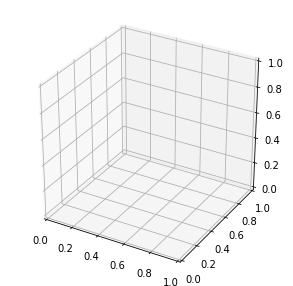

In [3]:
fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111, projection='3d')

In [4]:
fname = "cell_positions.npz"
f = np.load(fname)
goc = f['goc']
grc = f['grc']
glo = f['glo']

In [5]:
## Quito los elementos fuera del límite 300 x 300 x 86
goc = goc.tolist()
for i in range(len(goc)-1,-1,-1):
    trio=goc[i]
    if trio[2] > 86:
        del goc[i]
    for coord in trio:
        if (coord < 0)or(coord > 300):
            del goc[i]
            

grc = grc.tolist()
for i in range(len(grc)-1,-1,-1):
    trio=grc[i]
    if trio[2] > 86:
        del grc[i]
    for coord in trio:
        if (coord < 0)or(coord>300):
            del grc[i]
            

glo = glo.tolist()
for i in range(len(glo)-1,-1,-1):
    trio=glo[i]
    if trio[2] > 86:
        del glo[i]
    for coord in trio:
        if (coord < 0)or(coord>300):
            del glo[i]

In [6]:
goc = np.asarray(goc)
grc = np.asarray(grc)
glo = np.asarray(glo)

In [7]:
xgoc = []
ygoc = []
zgoc = []
for coord in goc:
    x = coord[0]
    y = coord[1]
    z = coord[2]
    xgoc.append(x)
    ygoc.append(y)
    zgoc.append(z)
    
xgoc = np.asarray(xgoc)
ygoc = np.asarray(ygoc)
zgoc = np.asarray(zgoc)

In [8]:
xgrc = []
ygrc = []
zgrc = []
for coord in grc:
    x = coord[0]
    y = coord[1]
    z = coord[2]
    xgrc.append(x)
    ygrc.append(y)
    zgrc.append(z)
    
xgrc = np.asarray(xgrc)
ygrc = np.asarray(ygrc)
zgrc = np.asarray(zgrc)

In [9]:
xglo = []
yglo = []
zglo = []
for coord in glo:
    x = coord[0]
    y = coord[1]
    z = coord[2]
    xglo.append(x)
    yglo.append(y)
    zglo.append(z)
    
xglo = np.asarray(xglo)
yglo = np.asarray(yglo)
zglo = np.asarray(zglo)

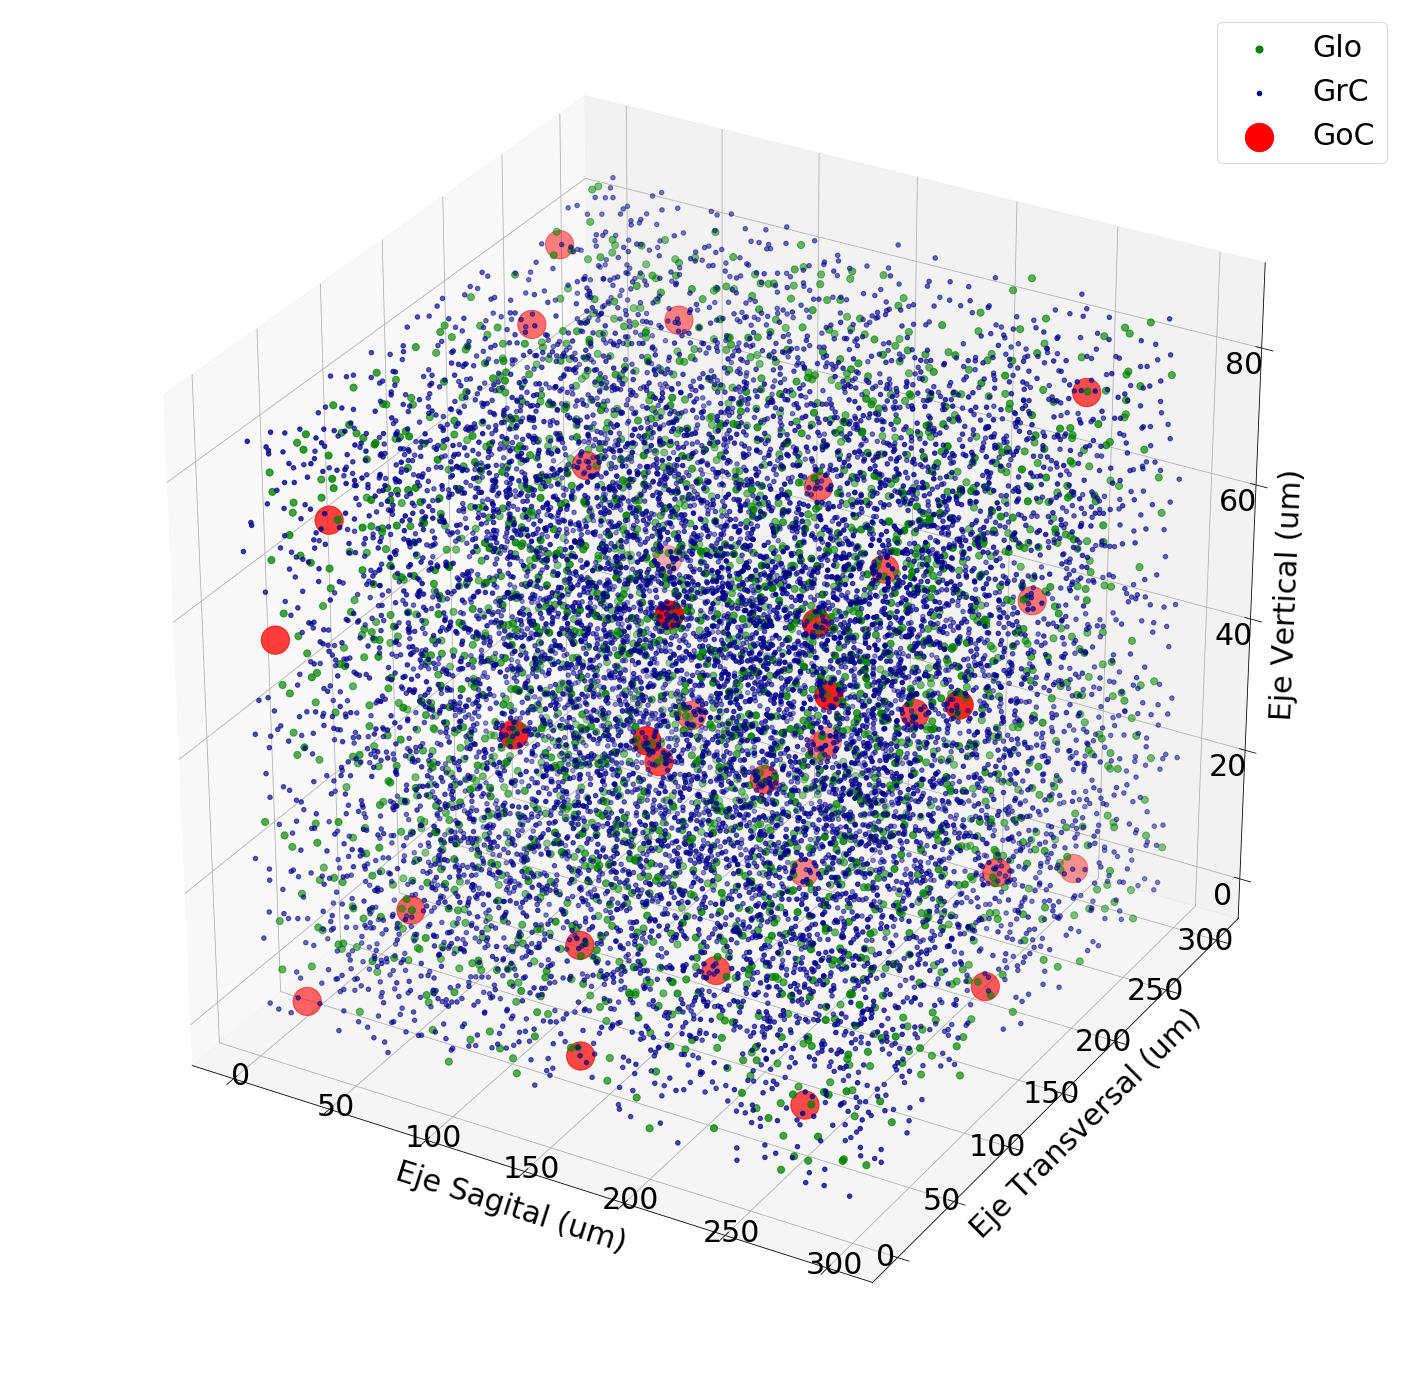

In [10]:
## REPRESENTACIÓN TRIDIMENSIONAL
plt.rcParams['xtick.major.pad']='-20'
plt.rcParams['ytick.major.pad']='-20'

fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xglo,yglo,zglo, s = 50, label='Glo', c = 'green')
ax.scatter(xgrc,ygrc,zgrc, c ='darkblue', label='GrC')
ax.scatter(xgoc,ygoc,zgoc, s = 800, c = 'red', label='GoC')

ax.set_xlabel("Eje Sagital (um)", fontsize=30)

ax.set_ylabel("Eje Transversal (um)", fontsize=30)

ax.set_zlabel("Eje Vertical (um)", fontsize=30)

ax.tick_params(labelsize=30)

ax.legend(loc="best", fontsize=30)

plt.show()


# GENERACIÓN DE POSICIONES

In [11]:
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'

In [12]:
# A few utility functions to p

def limit_to_box(x, box):
    """select only the points within a given box."""
    mf = x.copy()
    for i, t in enumerate(box):
        mf = mf[mf[:, i] >= t[0], :]
        mf = mf[mf[:, i] <= t[1], :]
    return mf

def print_range(goc):
    """prints the 3d range occupied by the cell population"""
    print(
        "Current range:\n",
        "x: [{}, {}]\n".format(goc[:, 0].min(), goc[:, 0].max()),
        "y: [{}, {}]\n".format(goc[:, 1].min(), goc[:, 1].max()),
        "z: [{}, {}]".format(goc[:, 2].min(), goc[:, 2].max()),
    )

def fix_coords(x, bbox):
    """removes the cells in a 25 um-wide gutter."""
    y = x - 25
    y = limit_to_box(y, bbox)
    print_range(y)
    return y


In [13]:
# load the data
fname = "cell_positions.npz"
#fname = "../../test_data/generated_positions/coords_20190626_1_6.npz"
f = np.load(fname)


# reajustamos los datos a mi volumen inicial, ya que el volumen donde se generaron era mayor
bbox = [[0, 300], [0, 300], [0, 86]]
grc = fix_coords(f['grc'], bbox) 
glo = fix_coords(f['glo'], bbox)
goc = fix_coords(f['goc'], bbox)

# añadimos la perturbación
grx = grc + np.random.randn(*grc.shape)*0.2 
glx = glo + np.random.randn(*glo.shape)
gox = goc + np.random.randn(*goc.shape)

Current range:
 x: [0.01007886683105852, 299.97627600396305]
 y: [0.0016084607539958995, 299.9740350637996]
 z: [0.03250401980833573, 85.98852789356106]
Current range:
 x: [0.2283811318694191, 299.9682306051641]
 y: [0.09465657130875016, 299.99087797479916]
 z: [0.011711585735397989, 85.96558708462273]
Current range:
 x: [0.17999999999999972, 297.51]
 y: [16.060000000000002, 297.42]
 z: [0.1999999999999993, 85.79]


In [14]:
nn = NearestNeighbors()
nn.fit(grx)
dists, nnids = nn.kneighbors(grx, n_neighbors=2, return_distance=True)

nn.fit(grc)
dists_u, nnids = nn.kneighbors(grc, n_neighbors=2, return_distance=True)

nnids = nnids[:,1]
dists = dists[:,1]

dists_u = dists_u[:,1]

### Funciones de densidad de probabilidad de vecinos más cercanos 

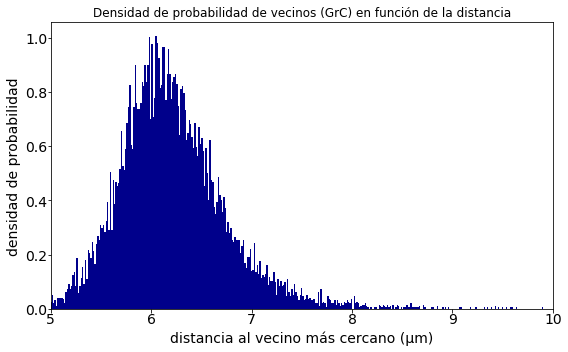

In [15]:
_, ax = plt.subplots(figsize=(8, 5))
ax.hist(dists, 450, density = True, color = 'darkblue')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

ax.set(
    xlim=[5, 10],
    xlabel='distancia al vecino más cercano (μm)',
    ylabel='densidad de probabilidad'
)

plt.title('Densidad de probabilidad de vecinos (GrC) en función de la distancia')
plt.tight_layout()
plt.savefig('nn_dist_hist_grc.png', dpi=600)

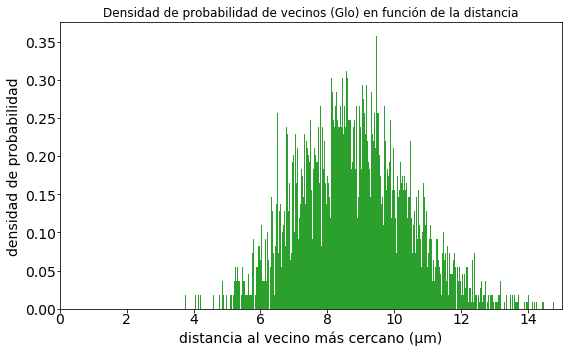

In [16]:
## para las glomérulos
nn = NearestNeighbors()
nn.fit(glo)
dists, nnids = nn.kneighbors(glo, n_neighbors=2, return_distance=True)

nn.fit(glx)
dists_u, nnids = nn.kneighbors(glx, n_neighbors=2, return_distance=True)

nnids = nnids[:,1]
dists = dists[:,1]

dists_u = dists_u[:,1]

_, ax = plt.subplots(figsize=(8,5))
ax.hist(dists, 450, density = True, color = 'tab:green')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

ax.set(
    xlim=[0, 15],
    xlabel='distancia al vecino más cercano (μm)',
    ylabel='densidad de probabilidad'
)

plt.title('Densidad de probabilidad de vecinos (Glo) en función de la distancia')
plt.tight_layout()
plt.savefig('nn_dist_hist_glo.png', dpi=600)

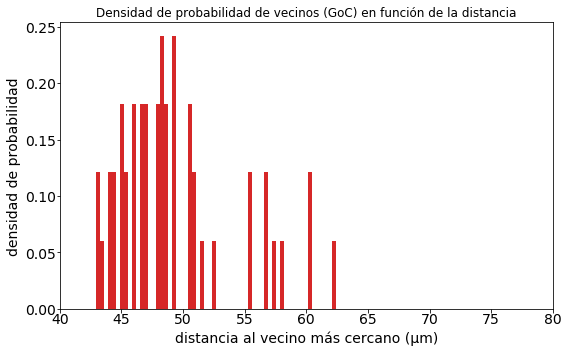

In [17]:
## para las glomérulos
nn = NearestNeighbors()
nn.fit(goc)
dists, nnids = nn.kneighbors(goc, n_neighbors=2, return_distance=True)

nn.fit(gox)
dists_u, nnids = nn.kneighbors(gox, n_neighbors=2, return_distance=True)

nnids = nnids[:,1]
dists = dists[:,1]

dists_u = dists_u[:,1]

_, ax = plt.subplots(figsize=(8,5))
ax.hist(dists, 60, density=True, color='tab:red')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

ax.set(
    xlim=[40, 80],
    xlabel='distancia al vecino más cercano (μm)',
    ylabel='densidad de probabilidad'
)


plt.title('Densidad de probabilidad de vecinos (GoC) en función de la distancia')

plt.tight_layout()
plt.savefig('nn_dist_hist_goc.png', dpi=600)

### Funciones de distribución radial

In [18]:
# Limitamos el volumen para evitar efectos de contorno
gry = limit_to_box(grx, [[15, 270], [15, 270], [15, 70]])

nn = NearestNeighbors(n_jobs=-1)
nn.fit(grx)

mcounts = []
sdcounts = []
dists = np.linspace(0, 30, 240)
for r in tqdm(dists):
    count = np.frompyfunc(lambda x: x.size, 1, 1)(nn.radius_neighbors(
        gry, radius=r, return_distance=False
    )).astype(float) - 1
    mcounts.append(count.mean())
    sdcounts.append(count.std()/np.sqrt(count.size))



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


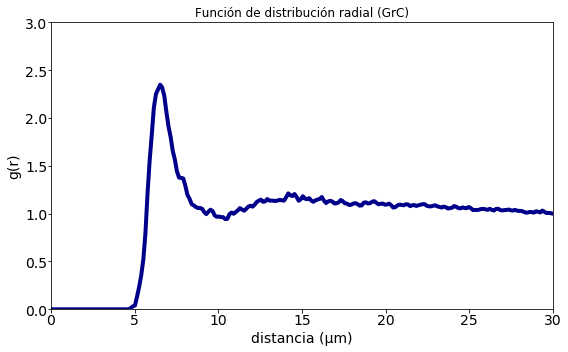

In [19]:
cc2 = np.gradient(mcounts)/(dists**2)
cc2_0 = cc2[-1]
cc2 = cc2/cc2_0

mcounts = np.array(mcounts)
sdcounts = np.array(sdcounts)

cc2_u = np.gradient(mcounts + 150*sdcounts)/(dists**2+0.001)/cc2_0
cc2_d = np.gradient(mcounts - 150*sdcounts)/(dists**2+0.001)/cc2_0

_, ax = plt.subplots(figsize=(8,5))
ax.plot(dists, cc2, 'k', linewidth=4, color = 'darkblue')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)

ax.set(
    ylim = [0, 3],
    xlim = [0, 30],
    xlabel='distancia (μm)',
    ylabel='g(r)'
)

plt.title('Función de distribución radial (GrC)')
plt.tight_layout()
plt.savefig('cc2_grc.png', dpi=600)

In [20]:

gly = limit_to_box(glx, [[15, 270], [15, 270], [15, 70]])

nn = NearestNeighbors(n_jobs=-1)
nn.fit(glx)

mcounts = []
sdcounts = []
dists = np.linspace(0, 30, 240)
for r in tqdm(dists):
    count = np.frompyfunc(lambda x: x.size, 1, 1)(nn.radius_neighbors(
        gly, radius=r, return_distance=False
    )).astype(float) - 1
    mcounts.append(count.mean())
    sdcounts.append(count.std()/np.sqrt(count.size))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


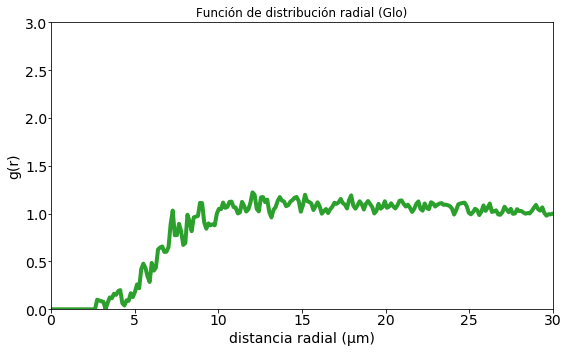

In [21]:
cc2 = np.gradient(mcounts)/(dists**2)
cc2_0 = cc2[-1]
cc2 = cc2/cc2_0

mcounts = np.array(mcounts)
sdcounts = np.array(sdcounts)

cc2_u = np.gradient(mcounts + 150*sdcounts)/(dists**2+0.001)/cc2_0
cc2_d = np.gradient(mcounts - 150*sdcounts)/(dists**2+0.001)/cc2_0

_, ax = plt.subplots(figsize=(8,5))
ax.plot(dists, cc2, 'k', linewidth=4, color = 'tab:green')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax.set(
    ylim = [0, 3],
    xlim = [0, 30],
    xlabel='distancia radial (μm)',
    ylabel='g(r)'
)

plt.title('Función de distribución radial (Glo)')
plt.tight_layout()
plt.savefig('cc2_glo.png', dpi=600)

# GENERACIÓN DE CONEXIONES

## AA to GoC excitatory

In [22]:

filename = "AAtoGoC.h5"

with h5py.File(filename, "r") as hdf:
    base_items = list(hdf.items())
    print('Items in the base directory  ', base_items)
    connection = hdf.get('connection')
    connection_items = list(connection.items())
    print('Items in connection  ', connection_items)
    table = np.array(connection.get('_i_table'))
    dataset = np.array(connection.get('table'))
    print ('data dtype:', dataset.dtype, '\nshape:', dataset.shape)
    targetAA = dataset[:]['target'] 
    print ('target dtype:', targetAA.dtype, '\nshape:', targetAA.shape)
    sourceAA = dataset[:]['source'] 
    print ('source dtype:', sourceAA.dtype, '\nshape:', sourceAA.shape)
    distAA = dataset[:]['values_block_1'] 
    print ('dist dtype:', distAA.dtype, '\nshape:', distAA.shape)
    

Items in the base directory   [('connection', <HDF5 group "/connection" (2 members)>)]
Items in connection   [('_i_table', <HDF5 group "/connection/_i_table" (3 members)>), ('table', <HDF5 dataset "table": shape (144209,), type "|V32">)]
data dtype: [('index', '<i8'), ('values_block_0', '<i4', (2,)), ('values_block_1', '<f8', (1,)), ('source', '<i4'), ('target', '<i4')] 
shape: (144209,)
target dtype: int32 
shape: (144209,)
source dtype: int32 
shape: (144209,)
dist dtype: float64 
shape: (144209, 1)


In [23]:
## Juntamos source (GrC) con target (GoC)
dfAA = pd.DataFrame({'sourceAA':sourceAA, 'targetAA':targetAA})
dfAA = dfAA.drop_duplicates()
## Frecuencia de cuántas AA de GrC distintas están unidas a cada Golgi
## Frecuencia de convergencia
frAAtoGOCcon = dfAA.targetAA.value_counts()

In [24]:
# Número medio de veces que una GoC se conecta con un AA de una GrC distinta
# Es decir, RATIO DE CONVERGENCIA:
conAA = sum(frAAtoGOCcon)/len(frAAtoGOCcon)
print('Ratio de Convergencia AA to GoC ', sum(frAAtoGOCcon)/len(frAAtoGOCcon))

Ratio de Convergencia AA to GoC  317.0


In [25]:
## Frecuencia de divergencia
frAAtoGOCdiv = dfAA.sourceAA.value_counts()
# Número medio de veces que una GrC se conecta por medio de su AA a una GoC distinta
# Es decir, RATIO DE DIVERGENCIA
divAA = sum(frAAtoGOCdiv)/len(frAAtoGOCdiv)
print('Ratio de Divergencia AA to GoC ', sum(frAAtoGOCdiv)/len(frAAtoGOCdiv))

Ratio de Divergencia AA to GoC  1.9004363498387402


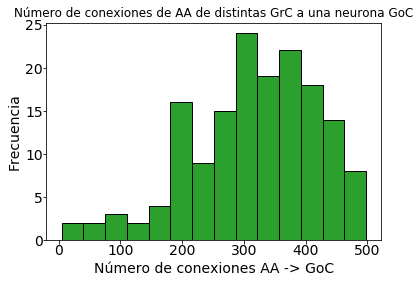

In [26]:
## Histograma frecuencia de convergencias de AA (GrC) en GoC

plt.hist(frAAtoGOCcon, bins = 14, color = 'tab:green', ec = 'k')
plt.ylabel('Frecuencia', fontsize = 14)
plt.xlabel('Número de conexiones AA -> GoC', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Número de conexiones de AA de distintas GrC a una neurona GoC')
plt.savefig('histrograma_AA_GoC.png', dpi=100, bbox_inches = "tight")

In [27]:
## distancias máximas, mínimas y medias de conexión

from __future__ import division
max_valueAA = max(distAA)
min_valueAA = min(distAA)
avg_valueAA = 0 if len(distAA) == 0 else sum(distAA)/len(distAA)

print(max_valueAA)
print(min_valueAA)
print(avg_valueAA)

[85.99989191]
[0.00026291]
[44.11619518]


## PF to GoC excitatory

In [28]:
filename = "PFtoGoC.h5"

with h5py.File(filename, "r") as hdf:
    base_items = list(hdf.items())
    print('Items in the base directory  ', base_items)
    connection = hdf.get('connection')
    connection_items = list(connection.items())
    print('Items in connection  ', connection_items)
    table = np.array(connection.get('_i_table'))
    dataset = np.array(connection.get('table'))
    print ('data dtype:', dataset.dtype, '\nshape:', dataset.shape)
    targetPF = dataset[:]['target'] 
    print ('target dtype:', targetPF.dtype, '\nshape:', targetPF.shape)
    sourcePF = dataset[:]['source'] 
    print ('source dtype:', sourcePF.dtype, '\nshape:', sourcePF.shape)
    distPF = dataset[:]['values_block_1'] 
    print ('dist dtype:', distPF.dtype, '\nshape:', distPF.shape)    

Items in the base directory   [('connection', <HDF5 group "/connection" (2 members)>)]
Items in connection   [('_i_table', <HDF5 group "/connection/_i_table" (3 members)>), ('table', <HDF5 dataset "table": shape (172448,), type "|V32">)]
data dtype: [('index', '<i8'), ('values_block_0', '<i4', (2,)), ('values_block_1', '<f8', (1,)), ('source', '<i4'), ('target', '<i4')] 
shape: (172448,)
target dtype: int32 
shape: (172448,)
source dtype: int32 
shape: (172448,)
dist dtype: float64 
shape: (172448, 1)


In [29]:
## Juntamos source (GrC) con target (GoC)
dfPF = pd.DataFrame({'sourcePF':sourcePF, 'targetPF':targetPF})
dfPF = dfPF.drop_duplicates()
## Frecuencia de cuántas AA de GrC distintas están unidas a cada Golgi
frPFtoGOCcon = dfPF.targetPF.value_counts()

In [30]:
# Número medio de veces que una GoC se conecta con un PF de una GrC distinta
# Es decir, RATIO DE CONVERGENCIA:
conPF = sum(frPFtoGOCcon)/len(frPFtoGOCcon)
print('Ratio de Convergencia PF to GoC ', sum(frPFtoGOCcon)/len(frPFtoGOCcon))

Ratio de Convergencia PF to GoC  746.2115384615385


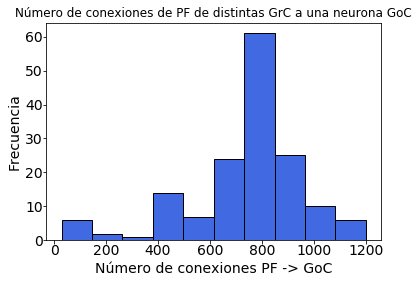

In [31]:
plt.hist(frPFtoGOCcon, bins = 10, color = 'royalblue', ec = 'k')
plt.ylabel('Frecuencia', fontsize = 14)
plt.xlabel('Número de conexiones PF -> GoC', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Número de conexiones de PF de distintas GrC a una neurona GoC')
plt.savefig('histrograma_PF_GoC.png', dpi=100, bbox_inches = "tight")

In [32]:
## Frecuencia de divergencia
frPFtoGOCdiv = dfPF.sourcePF.value_counts()
# Número medio de veces que una GrC se conecta por medio de su AA a una GoC distinta
# Es decir, RATIO DE DIVERGENCIA
divPF = sum(frPFtoGOCdiv)/len(frPFtoGOCdiv)
print('Ratio de Divergencia PF to GoC ', sum(frPFtoGOCdiv)/len(frPFtoGOCdiv))

Ratio de Divergencia PF to GoC  3.780249399233617


In [33]:
## distancias máximas, mínimas y medias de conexión

from __future__ import division

max_valuePF = max(distPF)
min_valuePF = min(distPF)
avg_valuePF = 0 if len(distPF) == 0 else sum(distPF)/len(distPF)

print(max_valuePF)
print(min_valuePF)
print(avg_valuePF)

[491.00266283]
[86.00001185]
[209.83101309]


## GoC to GoC inhibitory

In [34]:
dist = np.loadtxt( 'GoCtoGoCdistances.dat' )
source = np.loadtxt( 'GoCtoGoCsources.dat' )
target = np.loadtxt( 'GoCtoGoCtargets.dat' )

In [35]:
## Juntamos source (GrC) con target (GoC)
dfGOC = pd.DataFrame({'sourceGoC':source, 'targetGoC':target})
dfGOC = dfGOC.drop_duplicates()

In [36]:
# Número medio de veces que una GoC se conecta con una GoC distinta
# Es decir, RATIO DE CONVERGENCIA:
## Frecuencia de cuántas AA de GrC distintas están unidas a cada Golgi
frGOCtoGOCcon = dfGOC.targetGoC.value_counts()

conINH = sum(frGOCtoGOCcon)/len(frGOCtoGOCcon)
print('Ratio de Convergencia GoC to GoC ', sum(frGOCtoGOCcon)/len(frGOCtoGOCcon))

Ratio de Convergencia GoC to GoC  58.68987341772152


In [37]:
## Frecuencia de divergencia
frGOCtoGOCdiv = dfGOC.sourceGoC.value_counts()

# Número medio de veces que una GrC se conecta por medio de su AA a una GoC distinta
# Es decir, RATIO DE DIVERGENCIA
divINH = sum(frGOCtoGOCdiv)/len(frGOCtoGOCdiv)
print('Ratio de Divergencia GOC to GoC ', sum(frGOCtoGOCdiv)/len(frGOCtoGOCdiv))

Ratio de Divergencia GOC to GoC  58.68987341772152


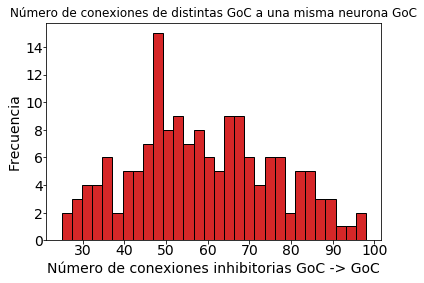

In [38]:
plt.hist(frGOCtoGOCcon, bins = 30, color = 'tab:red', ec = 'k')
plt.ylabel('Frecuencia', fontsize = 14)
plt.xlabel('Número de conexiones inhibitorias GoC -> GoC', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Número de conexiones de distintas GoC a una misma neurona GoC')
plt.savefig('histrograma_GoC_GoC_inh.png', dpi=100, bbox_inches = "tight")

In [39]:
from __future__ import division
max_valueINH = max(dist)
min_valueINH = min(dist)
avg_valueINH = 0 if len(dist) == 0 else sum(dist)/len(dist)

print(max_valueINH)
print(min_valueINH)
print(avg_valueINH)

281.60513529663706
42.884874956096084
162.9803342055337


## GoC to GoC gap

In [40]:
dist = np.loadtxt( 'GoCtoGoCgapdistances.dat' )
source = np.loadtxt( 'GoCtoGoCgapsources.dat' )
target = np.loadtxt( 'GoCtoGoCgaptargets.dat' )

In [41]:
## Juntamos source (GrC) con target (GoC)
dfGOCgap = pd.DataFrame({'sourceGoC':source, 'targetGoC':target})
dfGOCgap = dfGOCgap.drop_duplicates()
## Frecuencia de cuántas AA de GrC distintas están unidas a cada Golgi
frGOCtoGOCgapcon = dfGOCgap.targetGoC.value_counts()

In [42]:
## Frecuencia de divergencia
frGOCtoGOCgapdiv = dfGOCgap.sourceGoC.value_counts()
# Número medio de veces que una GrC se conecta por medio de su AA a una GoC distinta
# Es decir, RATIO DE DIVERGENCIA
divGAP = sum(frGOCtoGOCgapdiv)/len(frGOCtoGOCgapdiv)
print('Ratio de Divergencia GoC to GoC ', sum(frGOCtoGOCgapdiv)/len(frGOCtoGOCgapdiv))

Ratio de Divergencia GoC to GoC  8.822784810126583


In [43]:
# Número medio de veces que una GoC se conecta con una GoC distinta
# Es decir, RATIO DE CONVERGENCIA:
conGAP = sum(frGOCtoGOCgapcon)/len(frGOCtoGOCgapcon)
print('Ratio de Convergencia GoC to GoC ', sum(frGOCtoGOCgapcon)/len(frGOCtoGOCgapcon))

Ratio de Convergencia GoC to GoC  8.822784810126583


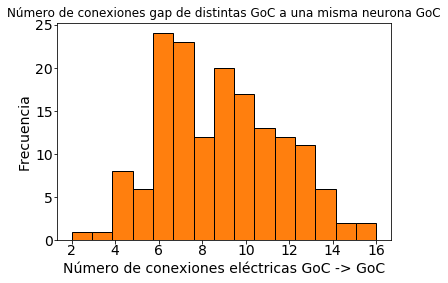

In [44]:
plt.hist(frGOCtoGOCgapcon, bins = 15, color = 'tab:orange', ec = 'k')
plt.ylabel('Frecuencia', fontsize = 14)
plt.xlabel('Número de conexiones eléctricas GoC -> GoC', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Número de conexiones gap de distintas GoC a una misma neurona GoC')
plt.savefig('histrograma_GoC_GoC_gap.png', dpi=100, bbox_inches = "tight")

In [45]:
from __future__ import division

max_valueGAP = max(dist)
min_valueGAP = min(dist)
avg_valueGAP = 0 if len(dist) == 0 else sum(dist)/len(dist)


print(max_valueGAP)
print(min_valueGAP)
print(avg_valueGAP)

79.98558682662771
42.03856086975384
62.30682308198212


## Glo to GrC

In [46]:
#dist = np.loadtxt( 'GLtoGCdistances.dat' )
source = np.loadtxt( 'GLtoGCsources.dat' )
target = np.loadtxt( 'GLtoGCtargets.dat' )

In [47]:
## Juntamos source (Glo) con target (GrC)
dfGlo = pd.DataFrame({'sourceGlo':source, 'targetGrC':target})
dfGlo = dfGlo.drop_duplicates()
## Frecuencia de cuántos Glo están conectadas a cada GrC
## Frecuencia de convergencia
frGlotoGrCcon = dfGlo.targetGrC.value_counts()

In [48]:
# Número medio de veces que una GoC se conecta con un AA de una GrC distinta
# Es decir, RATIO DE CONVERGENCIA:
conGlo = sum(frGlotoGrCcon)/len(frGlotoGrCcon)
print('Ratio de Convergencia Glo to GrC ', sum(frGlotoGrCcon)/len(frGlotoGrCcon))

Ratio de Convergencia Glo to GrC  4.149848350815114


In [49]:
## Frecuencia de divergencia
frGlotoGrCdiv = dfGlo.sourceGlo.value_counts()
# Número medio de veces que una GrC se conecta por medio de su AA a una GoC distinta
# Es decir, RATIO DE DIVERGENCIA
divGlo = sum(frGlotoGrCdiv)/len(frGlotoGrCdiv)
print('Ratio de Divergencia Glo to GrC ', sum(frGlotoGrCdiv)/len(frGlotoGrCdiv))

Ratio de Divergencia Glo to GrC  13.842449151649278


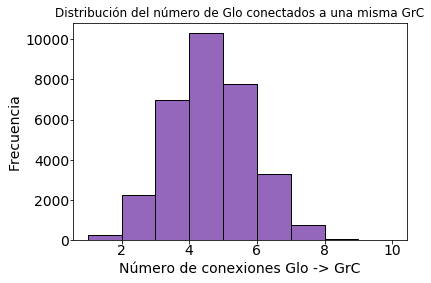

In [50]:
plt.hist(frGlotoGrCcon, bins = 9, color = 'tab:purple', ec = 'k')
plt.ylabel('Frecuencia', fontsize = 14)
plt.xlabel('Número de conexiones Glo -> GrC', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Distribución del número de Glo conectados a una misma GrC')
plt.savefig('histrograma_Glo_GrC_con.png', dpi=100, bbox_inches = "tight")

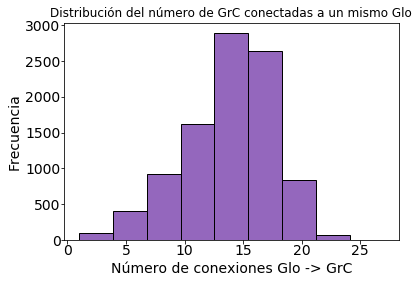

In [51]:
plt.hist(frGlotoGrCdiv, bins = 9, color = 'tab:purple', ec = 'k')
plt.ylabel('Frecuencia', fontsize = 14)
plt.xlabel('Número de conexiones Glo -> GrC', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Distribución del número de GrC conectadas a un mismo Glo')
plt.savefig('histrograma_Glo_GrC_div.png', dpi=100, bbox_inches = "tight")

## Distances analysis

In [52]:
### representación de las distancias medias para mis datos
### y los de la literatura 

dist_media = np.array([avg_valueAA, avg_valuePF, avg_valueINH, avg_valueGAP, 7.85])
dist_max = np.array([max_valueAA, max_valuePF, max_valueINH, max_valueGAP, 7.85])
dist_min = np.array([min_valueAA, min_valuePF, min_valueINH, min_valueGAP, 7.85])
ratio_con = np.array([conAA, conPF, conINH, conGAP, conGlo])
ratio_div = np.array([divAA, divPF, divINH, divGAP, divGlo])

In [53]:
mi_modelo = pd.DataFrame({'distmedia':dist_media, 'distmax':dist_max, 'distmin':dist_min, 'ratiocon':ratio_con, 'ratiodiv':ratio_div})

In [54]:
mi_modelo["distmedia"] = mi_modelo.distmedia.astype(float)
mi_modelo["distmax"] = mi_modelo.distmax.astype(float)
mi_modelo["distmin"] = mi_modelo.distmin.astype(float)

In [55]:
mi_modelo.index = ['AA - GoC', 'PF - GoC', 'GoC - GoC (inh)', 'GoC - GoC (gap)', 'Glo - Grc']

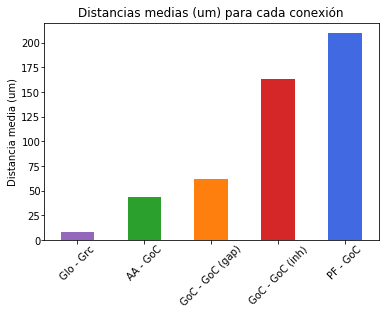

In [56]:
mi_modelo_dists = df1 = mi_modelo.iloc[:, 0:3] 
mi_modelo_dists = mi_modelo_dists.sort_values(by=['distmedia'])
df  = mi_modelo_dists.distmedia
ax = df.plot(kind='bar', rot=45, color=['tab:purple','tab:green', 'tab:orange','tab:red', 'royalblue'])
ax.set_title("Distancias medias (um) para cada conexión")
#ax.set_xlabel("Tipos de conexiones")
ax.set_ylabel("Distancia media (um)")
fig = ax.get_figure()
fig.savefig('distancias.png', dpi=100, bbox_inches = "tight")
#color={"AAtoGoC": "steelblue", "PFtoGoC": "royalblue", "GoCtoGoC(inh)": "tab:red", "GoCtoGoC(gap)": "tab:orange", "GlotoGrC": "tab:purple"}

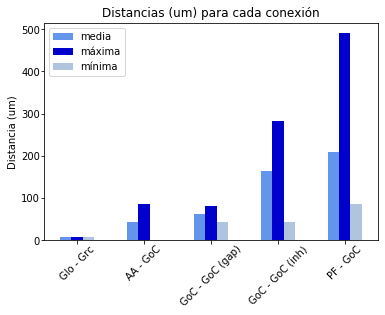

In [57]:
#fig, ax = plt.subplots()
mi_modelo_dists = mi_modelo_dists.sort_values(by=['distmedia'])
ax = mi_modelo_dists.plot(kind='bar', rot=45, color=['cornflowerblue', 'mediumblue', 'lightsteelblue'])
ax.set_title("Distancias (um) para cada conexión")
ax.set_ylabel("Distancia (um)")
labels = ['media', 'máxima', 'mínima']
ax.legend(labels)
fig = ax.get_figure()
fig.savefig('distancias_max_min_avg.png', dpi=100, bbox_inches = "tight")

#mi_modelo_dists.plot(kind='bar', ax=ax,  color=['tab:purple','tab:green', 'tab:orange','tab:red', 'royalblue'])
#ax.xticks(x, labels, rotation='vertical')

# Ratios Analysis

In [58]:
mi_modelo

,distmedia,distmax,distmin,ratiocon,ratiodiv
AA - GoC,44.116195,85.999892,0.000263,317.000000,1.900436
PF - GoC,209.831013,491.002663,86.000012,746.211538,3.780249
GoC - GoC (inh),162.980334,281.605135,42.884875,58.689873,58.689873
GoC - GoC (gap),62.306823,79.985587,42.038561,8.822785,8.822785
Glo - Grc,7.850000,7.850000,7.850000,4.149848,13.842449


In [59]:
ratioconlit = [400, 1000, 13.7, 2.2, 4]
ratioconlit = np.asarray(ratioconlit)

In [60]:
mi_modelo['ratioconlit'] = ratioconlit

In [61]:
df =  mi_modelo

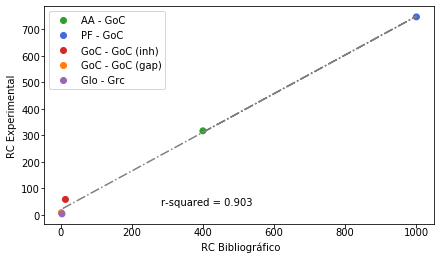

In [67]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import r2_score

x = df.ratioconlit
y = df.ratiocon

plt.figure(figsize=(7, 4))
ax = plt.axes()

m, b = np.polyfit(x, y, 1)
line = m*x + b

classes = ['AA - GoC', 'PF - GoC', 'GoC - GoC (inh)', 'GoC - GoC (gap)', 'Glo - Grc']

values = [0,1,2,3,4]

colours = ListedColormap(['tab:green','royalblue', 'tab:red', 'tab:orange', 'tab:purple'])

plt.annotate("r-squared = {:.3f}".format(r2_score(x, y)), xy=(1, 1), xytext=(100, 10), textcoords='offset points')

scatter = ax.scatter(x, y, c=values, cmap=colours)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)

ax.plot(x, line, "-.", color = 'gray')

ax.set_xlabel(' RC Bibliográfico')
ax.set_ylabel('RC Experimental')

plt.show()

fig = ax.get_figure()
fig.savefig('convergence_ratios.png', dpi=100, bbox_inches = "tight")


In [70]:
b

20.055517313788286

 ### divergence ratios

In [71]:
ratiodivlit = [2, 4, 13.7, 2.2, 14]
ratiodivlit = np.asarray(ratiodivlit)
df['ratiodivlit'] = ratiodivlit
df

,distmedia,distmax,distmin,ratiocon,ratiodiv,ratioconlit,ratiodivlit
AA - GoC,44.116195,85.999892,0.000263,317.000000,1.900436,400.0,2.0
PF - GoC,209.831013,491.002663,86.000012,746.211538,3.780249,1000.0,4.0
GoC - GoC (inh),162.980334,281.605135,42.884875,58.689873,58.689873,13.7,13.7
GoC - GoC (gap),62.306823,79.985587,42.038561,8.822785,8.822785,2.2,2.2
Glo - Grc,7.850000,7.850000,7.850000,4.149848,13.842449,4.0,14.0


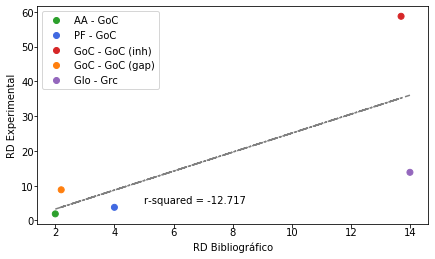

In [72]:
x = df.ratiodivlit
y = df.ratiodiv

plt.figure(figsize=(7, 4))
ax = plt.axes()

m, b = np.polyfit(x, y, 1)
line = m*x + b

classes = ['AA - GoC', 'PF - GoC', 'GoC - GoC (inh)', 'GoC - GoC (gap)', 'Glo - Grc']

values = [0,1,2,3,4]

colours = ListedColormap(['tab:green','royalblue', 'tab:red', 'tab:orange', 'tab:purple'])

plt.annotate("r-squared = {:.3f}".format(r2_score(x, y)), xy=(5, 5), xytext=(0, 0), textcoords='offset points')
fig = ax.get_figure()
scatter = ax.scatter(x, y, c=values, cmap=colours)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

ax.plot(x, line, "-.", color = 'gray')

ax.set_xlabel('RD Bibliográfico')
ax.set_ylabel('RD Experimental')

plt.show()
fig = ax.get_figure()
fig.savefig('divergence_ratios.png', dpi=100, bbox_inches = "tight")
